# Regressão 01 - tarefa 03 - transformações em X e Y

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [2]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill']-tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [3]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [4]:
y, X = patsy.dmatrices('tip ~ sex+smoker+time+net_bill',tips)

In [5]:
modelo = sm.OLS(y,X).fit()

In [6]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.64e-20
Time:                        12:34:50   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y, X = patsy.dmatrices('tip ~ net_bill',tips)
modelo2 = sm.OLS(y,X).fit()

In [8]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.02e-23
Time:                        12:34:50   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
tips['pred_modelo2'] = modelo2.fittedvalues

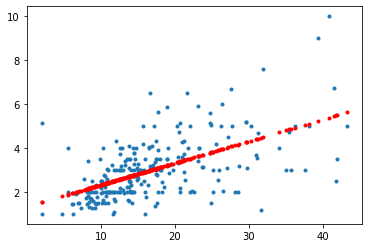

In [10]:
plt.plot(tips['net_bill'], tips['tip'],'.')
plt.plot(tips['net_bill'], tips['pred_modelo2'],'r.')

In [11]:
tips['resid_modelo2'] = modelo2.resid

<AxesSubplot:xlabel='net_bill', ylabel='resid_modelo2'>

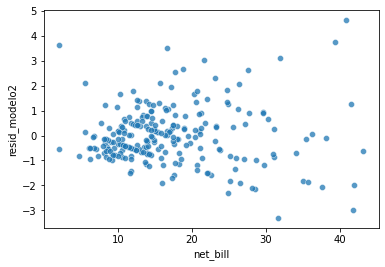

In [12]:
sns.scatterplot(x='net_bill',y='resid_modelo2',data=tips,alpha=.75)

In [13]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill)',tips)
modelo3 = sm.OLS(y,X).fit()

In [14]:
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.40e-20
Time:                        12:34:52   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
tips['pred_modelo3'] = modelo3.fittedvalues

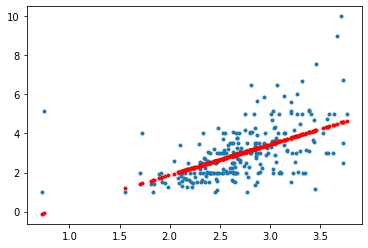

In [16]:
plt.plot(np.log(tips['net_bill']), tips['tip'],'.')
plt.plot(np.log(tips['net_bill']),tips['pred_modelo3'],'r.')

In [17]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill,2)',tips)
modelo4 = sm.OLS(y,X).fit()

In [18]:
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.47e-20
Time:                        12:34:52   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
tips['pred_modelo4'] = modelo4.fittedvalues

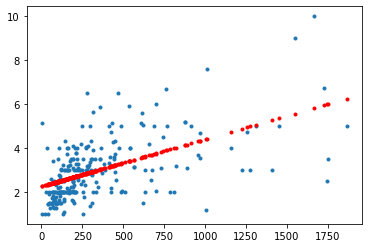

In [20]:
plt.plot(np.power(tips['net_bill'],2), tips['tip'],'.')
plt.plot(np.power(tips['net_bill'],2),tips['pred_modelo4'],'r.')

Escolhemos o modelo 2 como melhor modelo, mesmo não tendo r² melhor que o modelo1, tem um r² bem próximo e tiramos as variáveis não significantes, e também pela análise gráfica de resíduo

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [21]:
y, X = patsy.dmatrices('np.log(tip) ~ sex+smoker+time+net_bill',tips)

In [22]:
modelo5 = sm.OLS(y,X).fit()
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.21e-18
Time:                        12:34:53   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y, X = patsy.dmatrices('np.log(tip) ~ smoker+time+net_bill',tips)

In [24]:
modelo6 = sm.OLS(y,X).fit()
modelo6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     36.48
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.84e-19
Time:                        12:34:53   Log-Likelihood:                -97.423
No. Observations:                 244   AIC:                             202.8
Df Residuals:                     240   BIC:                             216.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4534      0.071      6.394      0.000       0.314       0.593
smoker[T.No]       0.0435      0.048      0.903      0.367      -0.051       0.138
time[T.Dinner]     0.0182      0.053      0.344      0.731      -0.086       0.122
net_bill           0.0303      0.003     10.228      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.175
Skew:                          -0.180   Prob(JB):                        0.337
Kurtosis:                       3.289   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
tips ['pred_modelo6'] = modelo6.fittedvalues

In [26]:
tips ['tip_log'] = np.log(tips['tip'])

In [27]:
tips['resid_modelo6'] = modelo6.resid

<AxesSubplot:xlabel='net_bill', ylabel='resid_modelo6'>

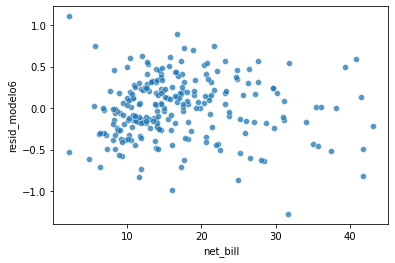

In [28]:
sns.scatterplot(x='net_bill',y='resid_modelo6',data=tips,alpha=.75)

In [29]:
modelo7 = smf.ols('np.log(tip) ~ smoker+time+np.log(net_bill)',tips).fit()
modelo7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     37.63
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.72e-20
Time:                        12:34:54   Log-Likelihood:                -96.227
No. Observations:                 244   AIC:                             200.5
Df Residuals:                     240   BIC:                             214.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4118      0.139     -2.962      0.003      -0.686      -0.138
smoker[T.No]         0.0162      0.048      0.340      0.734      -0.078       0.110
time[T.Dinner]       0.0205      0.053      0.390      0.697      -0.083       0.124
np.log(net_bill)     0.5124      0.049     10.393      0.000       0.415       0.610
==============================================================================
Omnibus:                       12.747   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.486
Skew:                           0.141   Prob(JB):                     6.52e-07
Kurtosis:                       4.650   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill_log', ylabel='resid_modelo7'>

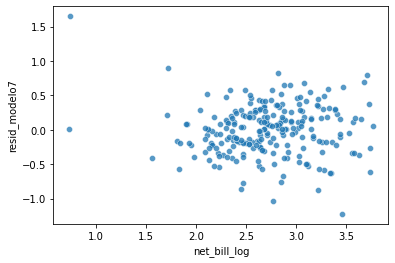

In [30]:
tips['resid_modelo7'] = modelo7.resid
tips['net_bill_log'] = np.log(tips['net_bill'])
sns.scatterplot(x='net_bill_log',y='resid_modelo7',data=tips,alpha=.75)

In [31]:
modelo8 = smf.ols('np.log(tip) ~ smoker+time+np.power(net_bill,2)',tips).fit()
modelo8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     27.31
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.12e-15
Time:                        14:09:44   Log-Likelihood:                -107.43
No. Observations:                 244   AIC:                             222.9
Df Residuals:                     240   BIC:                             236.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7303      0.061     12.059      0.000       0.611       0.850
smoker[T.No]              0.0505      0.050      1.002      0.317      -0.049       0.150
time[T.Dinner]            0.0384      0.055      0.701      0.484      -0.070       0.147
np.power(net_bill, 2)     0.0006      7e-05      8.802      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.071   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                2.066
Skew:                          -0.222   Prob(JB):                        0.356
Kurtosis:                       2.917   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='net_bill_power', ylabel='resid_modelo8'>

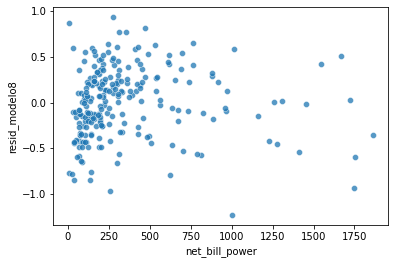

In [32]:
tips['resid_modelo8'] = modelo8.resid
tips['net_bill_power'] = np.power(tips['net_bill'],2)
sns.scatterplot(x='net_bill_power',y='resid_modelo8',data=tips,alpha=.75)

modelo 6 foi o escolhido

R² 0.313

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [34]:
df = pd.read_csv('previsao_de_renda.csv')
df.head(5)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [51]:
results = smf.ols('renda ~ np.power(tempo_emprego,2)',df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:28:41   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3789.9264     45.197     83.854      0.000    3701.334    3878.519
np.power(tempo_emprego, 2)     9.9976      0.201     49.780      0.000       9.604      10.391
==============================================================================
Omnibus:                     9652.373   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333382.424
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      27.391   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='tempo_emprego_power', ylabel='resid'>

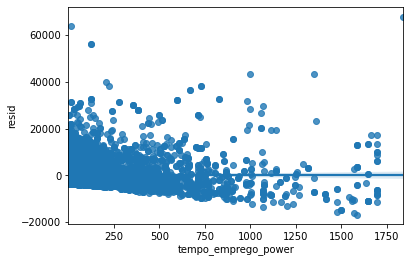

In [57]:
df['resid'] = results.resid
df['tempo_emprego_power'] = np.power(df['tempo_emprego'],2)
sns.regplot(x='tempo_emprego_power',y='resid',data=df)

In [62]:
results = smf.ols('renda ~ tempo_emprego',df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:40:30   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='tempo_emprego', ylabel='resid'>

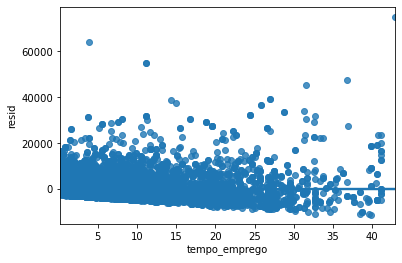

In [63]:
df['resid'] = results.resid
sns.regplot(x='tempo_emprego',y='resid',data=df)

In [80]:
reg_multipla = smf.ols('np.log(renda) ~ sexo+posse_de_imovel+tempo_emprego',data=df).fit()
print(reg_multipla.summary())

df['resid_multipla'] = reg_multipla.resid


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1195.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:05:55   Log-Likelihood:                -13353.
No. Observations:               12466   AIC:                         2.671e+04
Df Residuals:                   12462   BIC:                         2.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<AxesSubplot:xlabel='sexo', ylabel='resid_multipla'>

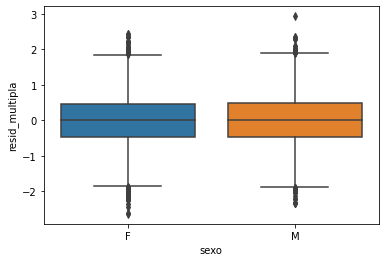

In [81]:
sns.boxplot(x='sexo',y='resid_multipla',data=df)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='resid_multipla'>

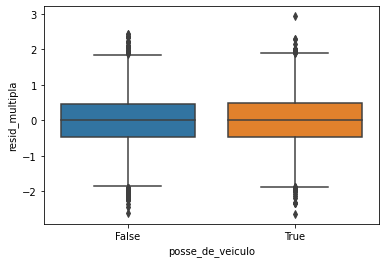

In [82]:
sns.boxplot(x='posse_de_veiculo',y='resid_multipla',data=df)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='resid_multipla'>

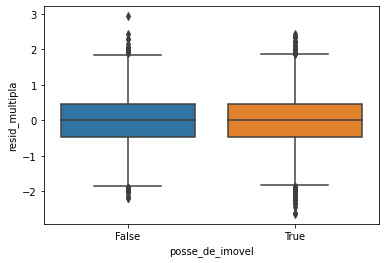

In [83]:
sns.boxplot(x='posse_de_imovel',y='resid_multipla',data=df)

<AxesSubplot:xlabel='tempo_emprego', ylabel='resid_multipla'>

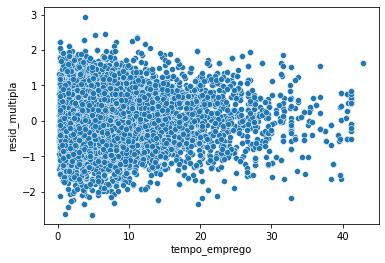

In [84]:
sns.scatterplot(x='tempo_emprego',y='resid_multipla',data=df)

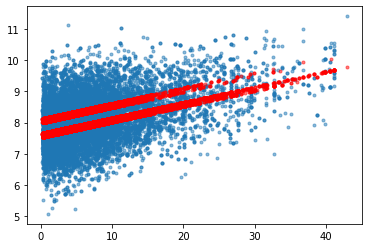

In [98]:
df['pred_log'] = reg_multipla.fittedvalues
df['renda_log'] = np.log(df['renda'])

plt.plot(df['tempo_emprego'],df['renda_log'],'.',alpha=.5)
plt.plot(df['tempo_emprego'],df['pred_log'],'r.',alpha=.5)

In [99]:
df[['renda_log','pred_log']].corr().iloc[0,1]**2

0.22343356455785546